<a href="https://colab.research.google.com/github/M-Traiki/CNN_Project_Week6/blob/main/Project_CNN_Ironhack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import keras

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # Loading the data set

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
# Inspecting the data set

class_names = ["airplane", "automobile","bird",
               "cat","deer","dog","frog","horse",
               "ship","truck"]

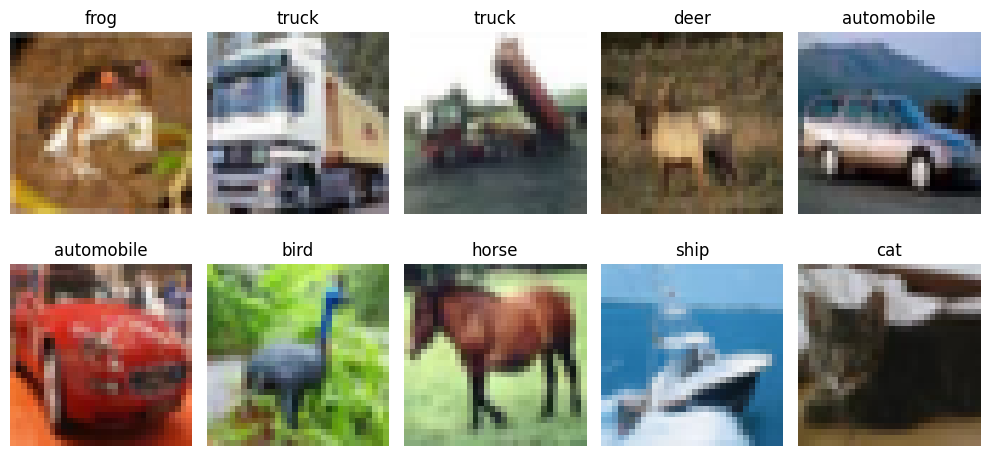

In [ ]:
# Printing out some training data with their respective labels

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


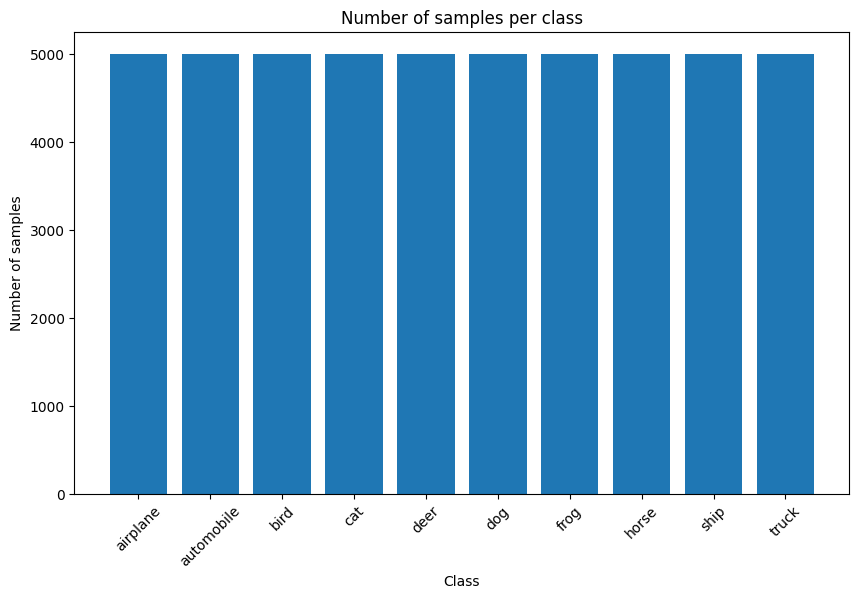

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [ ]:

from collections import Counter


labels = y_train
flat_labels = labels.flatten()
# Count the number of samples per class
class_counts = Counter(flat_labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [10]:
# converting images to grey scale
X_train_grayscaled = np.dot(X_train[..., :3], [0.2989, 0.5870, 0.1140])
X_test_grayscaled = np.dot(X_test[..., :3], [0.2989, 0.5870, 0.1140])

In [11]:
# Convert labels to one-hot vectors

from keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [12]:
# create a preprocessing layer for normalization

from keras.layers import Rescaling
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

# no resizingis needed


In [13]:
# build the CNN model

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

In [ ]:


model = Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    # Input shape is 28x28 pixels with 1 color channel (grayscale)
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
# fit the model

history = model.fit(X_train_grayscaled,y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2702 - loss: 3.2304 - val_accuracy: 0.4828 - val_loss: 1.4792
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5092 - loss: 1.4086 - val_accuracy: 0.5372 - val_loss: 1.3552
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5939 - loss: 1.1770 - val_accuracy: 0.5784 - val_loss: 1.2403
Epoch 4/10
 493/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6441 - loss: 1.0249

KeyboardInterrupt: 

In [ ]:
model.save("initial_model.keras")

In [ ]:
# initializing new model with tanh as activation fnuction
model_enhanced = Sequential([
    Conv2D(32, (3,3), activation='tanh', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='tanh'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])

In [ ]:
# compilimg enhanced model
model_enhanced.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
# fitting enhanced model

model_enhanced.fit(X_train_grayscaled,y_train_cat, epochs=10, validation_split=0.2)

In [ ]:
# previous model with Relu activation performed better with only 10 epochs of training. However, no conclusion can be done here as both models performed
# similarly and were only trained for 10 epochs.


In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])




In [8]:
from keras import optimizers

In [ ]:
# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
model_early_stopping.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# train the model
history = model_early_stopping.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
# with early stopping introduced and with a oatience equal to only 3 epochs. the training tends to cut early in within the first 10 epochs as no improvement on the
# validation score is noticed.
# thus the decision to change the architecture of the CNN

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
# with changing the number of filters of the first convulate layer to 64, no real improvement was noticed.
# instead we will try to also add the number of filter for the second convulotion layer
# patience will also be increased to 5 to avoid early cutting when there is room for improvement.

from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.01)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='tanh', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='tanh'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.0001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.005)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=128,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=256,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.0001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=512,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.0001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=128,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='tanh', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='tanh'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='tanh'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.Adam(learning_rate=0.0001)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=128,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=128,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.callbacks import EarlyStopping
model_early_stopping_trial_and_error = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=128,
                                   validation_data=(X_test_grayscaled,y_test_cat),
                                   callbacks=[early_stopping
                                              ])

In [ ]:
from keras.layers import Dropout

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),  # 25% dropout after first block

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),  # 25% dropout after second block

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),   # 50% dropout before output
    Dense(10, activation='softmax')
])

# setting the learning rate
optimizer = optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model_early_stopping_trial_and_error.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"] )

# setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)



# train the model
history = model_early_stopping_trial_and_error.fit(X_train_grayscaled,y_train_cat,
                                   epochs=100,
                                   validation_split=0.2,
                                   batch_size=128,

                                   callbacks=[early_stopping
                                              ])

In [ ]:
model_early_stopping_trial_and_error.save("best_model_RMS_with_drop.keras")

In [15]:
# Build transfer learning model
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input





In [ ]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [16]:
X_train_col = preprocess_input(X_train.numpy())
X_test_col = preprocess_input(X_test.numpy())



In [ ]:
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

/tmp/ipython-input-274156398.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras import models,layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_col,
                    y_train_cat,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=164,
                    callbacks=[early_stopping]
                    )

Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.1248 - loss: 2.2926 - val_accuracy: 0.1904 - val_loss: 2.2368
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1854 - loss: 2.2147 - val_accuracy: 0.2006 - val_loss: 2.1588
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2043 - loss: 2.1491 - val_accuracy: 0.2191 - val_loss: 2.1131
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2227 - loss: 2.1049 - val_accuracy: 0.2360 - val_loss: 2.0817
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2315 - loss: 2.0824 - val_accuracy: 0.2286 - val_loss: 2.0806
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2358 - loss: 2.0643 - val_accuracy: 0.2433 - val_loss: 2.0498
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2464 - loss: 2.0442 - val_accuracy: 0.2560 - val_loss: 2.0312
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2484 - loss: 2.0338 - val_

In [ ]:
from keras import models,layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train_col,
                    y_train_cat,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=164,
                    callbacks=[early_stopping]
                    )


Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.1209 - loss: 2.2931 - val_accuracy: 0.1829 - val_loss: 2.2333
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1803 - loss: 2.2078 - val_accuracy: 0.1993 - val_loss: 2.1510
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2027 - loss: 2.1369 - val_accuracy: 0.2218 - val_loss: 2.1023
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2225 - loss: 2.0990 - val_accuracy: 0.2393 - val_loss: 2.0720
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2385 - loss: 2.0666 - val_accuracy: 0.2475 - val_loss: 2.0568
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2437 - loss: 2.0548 - val_accuracy: 0.2568 - val_loss: 2.0346
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2505 - loss: 2.0368 - val_accuracy: 0.2574 - val_loss: 2.0233
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2540 - loss: 2.0253 - val_a

In [ ]:
from keras import models,layers
from keras import optimizers
model = models.Sequential([
    base_model,
    layers.Conv2D(64, (1,1), activation='relu'),
    layers.Dropout(0.25),
    layers.Conv2D(128, (1,1), activation='relu'),
    layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])
optimizer = optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train_col,
                    y_train_cat,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=164,
                    callbacks=[early_stopping]
                    )


Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.1187 - loss: 2.2890 - val_accuracy: 0.1829 - val_loss: 2.1500
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1850 - loss: 2.1567 - val_accuracy: 0.2190 - val_loss: 2.0955
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1991 - loss: 2.1156 - val_accuracy: 0.2316 - val_loss: 2.0549
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2163 - loss: 2.0918 - val_accuracy: 0.2446 - val_loss: 2.0434
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2232 - loss: 2.0804 - val_accuracy: 0.2554 - val_loss: 2.0238
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2266 - loss: 2.0680 - val_accuracy: 0.2396 - val_loss: 2.0463
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2360 - loss: 2.0637 - val_accuracy: 0.2327 - val_loss: 2.0684
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2372 - loss: 2.0531 - val_a

In [21]:
# upscaling image size
X_train_resized = tf.image.resize(X_train_col,(96,96))
X_test_resized = tf.image.resize(X_test_col,(96,96))

In [ ]:
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

In [ ]:
from keras import models,layers
from keras import optimizers
model = models.Sequential([
    base_model,
    layers.Conv2D(64, (1,1), activation='relu'),
    layers.Dropout(0.25),
    layers.Conv2D(128, (1,1), activation='relu'),
    layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])
optimizer = optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train_resized,
                    y_train_cat,
                    validation_data=(X_test_resized,y_test_cat),
                    validation_split=0.2,
                    epochs=100,
                    batch_size=164,
                    callbacks=[early_stopping]
                    )


Epoch 1/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 61s 141ms/step - accuracy: 0.1004 - loss: 2.3099 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.0975 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.0984 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.0969 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.0998 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.0991 - loss: 

In [12]:
import tensorflow as tf

In [13]:
transfer_model1 = keras.models.load_model('initial_transfer_best_model.keras')

In [16]:
transfer_model1.compile(
    optimizer='RMSprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [14]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [17]:
transfer_model1.fit(
    X_train_resized,
    y_train_cat,
    epochs=30,
    validation_split=0.2,
    batch_size = 164,
    callbacks = [early_stopping])

Epoch 1/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.1002 - loss: 2.3212 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 2/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 3/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 4/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.0975 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 5/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.1028 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 6/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.1008 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 7/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.0984 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 8/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.1000 - loss: 2.3027 - 

In [17]:
from keras import layers, models
from keras.applications import EfficientNetB3
from keras.callbacks import EarlyStopping










In [4]:

base_model = EfficientNetB3(
    include_top=False,              # remove the original ImageNet classifier
    weights='imagenet',             # use pretrained weights
    input_shape=(96, 96, 3)       # EfficientNetB3 expects ≥ 224×224
)


base_model.trainable = False





43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
transfer_model = models.Sequential([
    base_model,


    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.3),


    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')   # 10 classes (for CIFAR-10)
])

In [19]:
transfer_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = transfer_model.fit(
    X_train_resized,       # images resized to (224, 224)
    y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 77ms/step - accuracy: 0.1001 - loss: 2.3194 - val_accuracy: 0.1014 - val_loss: 2.3027
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.0978 - loss: 2.3028 - val_accuracy: 0.1022 - val_loss: 2.3027
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.0963 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.1009 - loss: 2.3027 - 

In [ ]:
# upscaling image size
X_train_resized = tf.image.resize(X_train_col,(96,96))
X_test_resized = tf.image.resize(X_test_col,(96,96))

In [28]:
from keras.applications import EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(32,32,3))
base_model.trainable = False



In [29]:
model = models.Sequential([
    layers.InputLayer((32,32,3)),

    base_model,

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = transfer_model.fit(
    X_train,
    y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 45ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0999 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1023 - loss: 2.3026 - val_accuracy: 0.0997 - val_loss: 2.3027
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0968 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3028
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1040 - loss: 2.3026 -

In [31]:
model = models.Sequential([
    layers.InputLayer((32,32,3)),

    base_model,

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = transfer_model.fit(
    X_train,
    y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0977 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0969 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0997 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1011 - loss: 2.3027 - 